# EDA on Baltimore Crime Data

##### import relevant Libraries / dependancies

In [4]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import missingno as msno
import autoreload 
import csv
import os
import sys
import folium as fl

from collections import defaultdict, Counter

%matplotlib inline
plt.style.use('ggplot')

pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 100)

sb.set_style('darkgrid')
sb.set()

#### Load Dataset from Local Machine

In [5]:
df = pd.read_csv("D:\Open Classroom\Datasets\Baltimore Crime Data (April 2022)\Baltimore_Part1_Crime_data.csv")
df.head()

,X,Y,RowID,CrimeDateTime,CrimeCode,Location,Description,Inside_Outside,Weapon,Post,District,Neighborhood,Latitude,Longitude,GeoLocation,Premise,VRIName,Total_Incidents,Shape
0,1.442562e+06,590731.068662,1,2022/04/01 09:31:00+00,6G,6300 EASTERN AVE,LARCENY,NaN,NaN,232,SOUTHEAST,BAYVIEW,39.2878,-76.5399,"(39.2878,-76.5399)",NaN,NaN,1,NaN
1,1.425428e+06,599464.931734,2,2022/04/01 11:00:00+00,6J,1300 E NORTH AVE,LARCENY,NaN,NaN,312,EASTERN,EAST BALTIMORE MIDWAY,39.3120,-76.6003,"(39.312,-76.6003)",NaN,Eastern 1,1,NaN
2,1.417097e+06,588539.130322,3,2022/04/01 00:01:00+00,6D,800 CARROLL ST,LARCENY FROM AUTO,NaN,NaN,932,SOUTHERN,WASHINGTON VILLAGE/PIGTOWN,39.2821,-76.6299,"(39.2821,-76.6299)",NaN,NaN,1,NaN
3,1.431878e+06,587437.730818,4,2022/04/01 18:00:00+00,6F,2700 LIGHTHOUSE PT E,LARCENY,NaN,NaN,214,SOUTHEAST,CANTON,39.2789,-76.5777,"(39.2789,-76.5777)",NaN,NaN,1,NaN
4,1.433804e+06,593238.069583,5,2022/04/01 21:00:00+00,3GF,3300 E FAYETTE ST,ROBBERY - COMMERCIAL,NaN,HANDGUN,222,SOUTHEAST,PATTERSON PARK NEIGHBORHOOD,39.2948,-76.5708,"(39.2948,-76.5708)",NaN,NaN,1,NaN


#### Statistical Representation of Dataset

In [6]:
df.shape

(516635, 19)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516635 entries, 0 to 516634
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                515747 non-null  float64
 1   Y                515747 non-null  float64
 2   RowID            516635 non-null  int64  
 3   CrimeDateTime    516635 non-null  object 
 4   CrimeCode        516635 non-null  object 
 5   Location         514081 non-null  object 
 6   Description      516635 non-null  object 
 7   Inside_Outside   442718 non-null  object 
 8   Weapon           107334 non-null  object 
 9   Post             514896 non-null  object 
 10  District         514896 non-null  object 
 11  Neighborhood     514865 non-null  object 
 12  Latitude         515747 non-null  float64
 13  Longitude        515747 non-null  float64
 14  GeoLocation      516635 non-null  object 
 15  Premise          442382 non-null  object 
 16  VRIName          60400 non-null   obje

In [8]:
round(df.describe(), 2)

,X,Y,RowID,Latitude,Longitude,Total_Incidents,Shape
count,515747.00,515747.00,516635.00,515747.00,515747.00,516635.0,0.0
mean,1442349.50,596454.38,258318.00,39.28,-76.56,1.0,NaN
std,817419.42,42627.28,149139.82,1.05,2.04,0.0,NaN
min,-1.72,-948896.13,1.00,0.00,-81.53,1.0,NaN
25%,1411692.72,590745.39,129159.50,39.29,-76.65,1.0,NaN
50%,1421521.47,596171.21,258318.00,39.30,-76.61,1.0,NaN
75%,1429139.78,604891.08,387476.50,39.33,-76.59,1.0,NaN
max,32070835.94,731212.66,516635.00,39.66,0.00,1.0,NaN


In [9]:
df.isnull().sum()

X                     888
Y                     888
RowID                   0
CrimeDateTime           0
CrimeCode               0
Location             2554
Description             0
Inside_Outside      73917
Weapon             409301
Post                 1739
District             1739
Neighborhood         1770
Latitude              888
Longitude             888
GeoLocation             0
Premise             74253
VRIName            456235
Total_Incidents         0
Shape              516635
dtype: int64

In [10]:
df.isnull().sum().sum()

1541695

#### Graphical Representation

<Axes: >

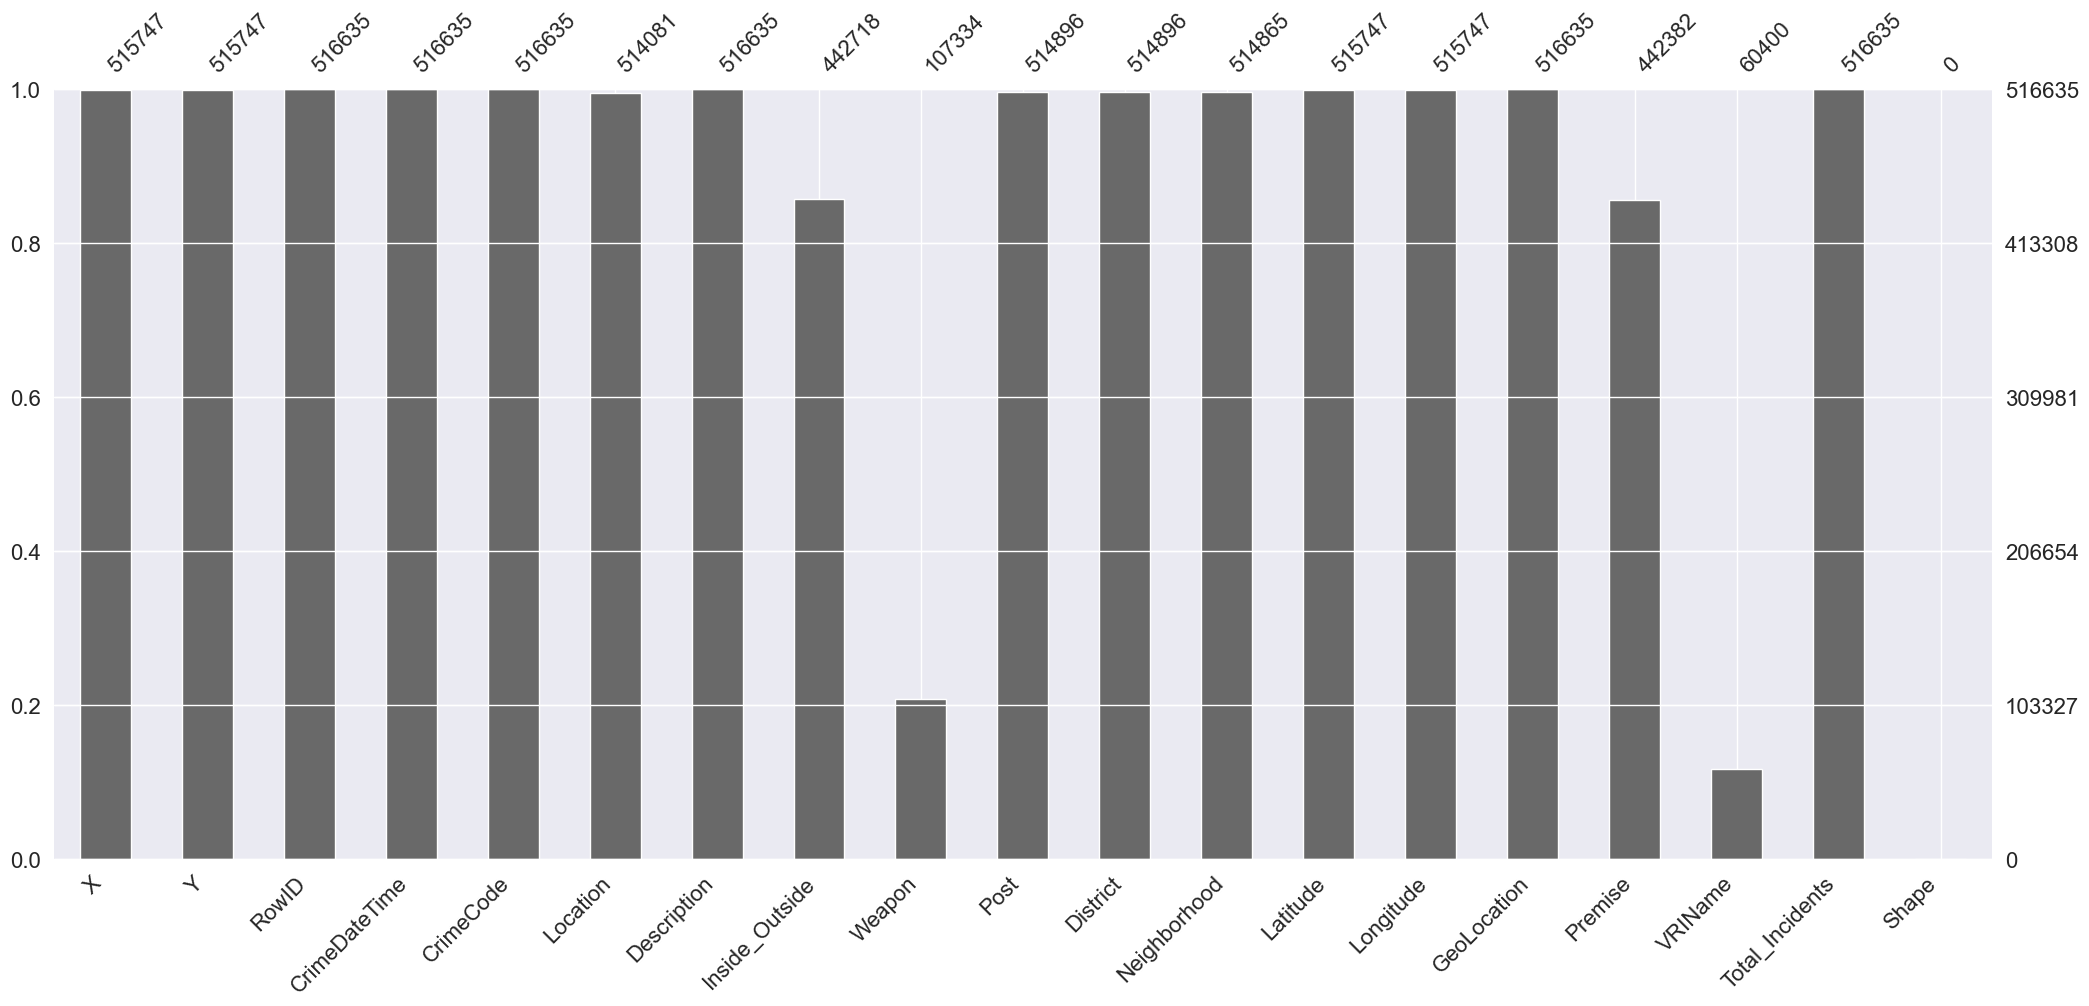

In [11]:
msno.bar(df)

#### Data Cleaning and Exploration

In [13]:
df.drop(columns = ['RowID', 'Post', 'VRIName', 'Shape'], inplace = True)
df.head(2)

,X,Y,CrimeDateTime,CrimeCode,Location,Description,Inside_Outside,Weapon,District,Neighborhood,Latitude,Longitude,GeoLocation,Premise,Total_Incidents
0,1.442562e+06,590731.068662,2022/04/01 09:31:00+00,6G,6300 EASTERN AVE,LARCENY,NaN,NaN,SOUTHEAST,BAYVIEW,39.2878,-76.5399,"(39.2878,-76.5399)",NaN,1
1,1.425428e+06,599464.931734,2022/04/01 11:00:00+00,6J,1300 E NORTH AVE,LARCENY,NaN,NaN,EASTERN,EAST BALTIMORE MIDWAY,39.3120,-76.6003,"(39.312,-76.6003)",NaN,1


In [14]:
df.dropna(axis = 'index', how = 'any', subset = ['X', 'Y', 'Location'], inplace = True)
df.head()
df.shape

(513627, 15)

In [15]:
df.isnull().sum()

X                       0
Y                       0
CrimeDateTime           0
CrimeCode               0
Location                0
Description             0
Inside_Outside      73552
Weapon             406974
District              768
Neighborhood          799
Latitude                0
Longitude               0
GeoLocation             0
Premise             73888
Total_Incidents         0
dtype: int64

In [16]:
df['Inside_Outside'] = df['Inside_Outside'].str.replace('Inside', 'I')
df['Inside_Outside'] = df['Inside_Outside'].str.replace('Outside', 'O')

In [17]:
sb.countplot(df['Inside_Outside'])

ValueError: could not convert string to float: 'O'

In [ ]:
round(df['Inside_Outside'].value_counts(normalize=True)*100, 2)

In [ ]:
round(df['Premise'].value_counts(normalize=True).head(10)*100, 2)

In [ ]:
plt.figure(figsize = (12, 8))
df['Weapon'].value_counts().head(100).plot(kind = 'barh')

In [ ]:
df.head()

In [ ]:
df[['Date', 'Time']] = df['CrimeDateTime'].str.split(' ', expand=True)
df.drop(columns = ['CrimeDateTime'], inplace = True)
df.head()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [ ]:
df['Time'] = pd.to_datetime(df['Time'])

In [ ]:
df.info()

In [ ]:
df['Date'].value_counts().head(8).to_frame().style.background_gradient(cmap = 'Blues')

In [ ]:
df['Time'].value_counts().head(8).to_frame().style.background_gradient(cmap = 'Reds')

In [ ]:
df['Day'] = df['Date'].dt.day_name()
df.head()

In [ ]:
plt.figure(figsize = (15, 8))
sb.countplot(df['Day'], hue = df['Description'], palette = 'icefire')
plt.xticks(rotation = 45)
plt.title('Crime Description Daily Ratio', fontdict={'fontsize': 14})

In [ ]:
plt.figure(figsize = (15, 8))
sb.countplot(df['Date'].dt.month_name(), hue = df['Description'], palette = 'icefire')
plt.xticks(rotation = 45)
plt.title('Crime Description Monthly Ratio', fontdict={'fontsize': 14})

In [ ]:
plt.figure(figsize = (20, 8))
sb.countplot(df['Date'].dt.year)
plt.xticks(rotation = 45)
plt.title('Crime Description Yearly Ratio', fontdict={'fontsize': 14})

In [ ]:
plt.figure(figsize = (15, 8))
sb.countplot(df['Date'].dt.month_name())

In [ ]:
df.head()

#### Locate Crime on map

In [ ]:

crime_locations = df[['Latitude', 'Longitude', 'Weapon', 'Neighborhood', 'Location']]

crime = pd.DataFrame(crime_locations)
weapon_used = crime.groupby('Neighborhood')
j = weapon_used['Weapon'].value_counts().to_frame().rename(columns = {'Weapon': 'Weapon Count'})
j['Weapon Count']



f = crime_locations['Weapon'].value_counts()

m = fl.Map(location = [crime_locations['Latitude'].mean(), crime_locations['Longitude'].mean()], zoom_start=14, control_scale=True)

for i, loc in crime_locations.head(1000).iterrows():
    fl.Marker(location = [loc['Latitude'], loc['Longitude']], tooltip=(loc['Neighborhood'], loc['Location'])).add_to(m)
m

In [ ]:
crime = pd.DataFrame(crime_locations)
weapon_used = crime.groupby('Neighborhood')
j = weapon_used['Weapon'].value_counts().to_frame().rename(columns = {'Weapon': 'Weapon Count'})
j['Weapon Count'].head()

In [ ]:
for i, loc in crime_locations.head(1000).iterrows():
    print(loc[loc['Location'].value_counts()])
    break